### Creating a Posting List

In [1]:
dict = { i: [] for i in range(0, 80) }

In [3]:
feature_dict = { i: [] for i in range(0, 80) }

Import Model

In [4]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
object_detection_model = YOLO('yolov8n.pt')

Posting List for a object || Creating Posting List for a single object

In [5]:
image_path = './Dataset/download/Fruits/31.jpeg'
results = object_detection_model( image_path, conf = 0.5)  

# extracting results
image_results = results[0].boxes.cpu().numpy()

# getting class labels
class_labels = image_results.cls
class_labels = set(class_labels)

# adding image in respective class label
for i in class_labels:
    dict[i].append(image_path)


image 1/1 /home/epsilon/Desktop/Google-lens-prototype/Dataset/download/Fruits/31.jpeg: 640x512 1 orange, 1 refrigerator, 112.3ms
Speed: 5.2ms preprocess, 112.3ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 512)


In [6]:
results[0].names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

Create Posting lists for objects and all images in dataset 

In [7]:
import ReadBuddy as rb
my_reader=rb.ReadBuddy("./Dataset/download/")
_,folder_dict=my_reader.create_folder_dictionary()


In [8]:
def get_class_id(model, image_path):
    results = model( image_path, conf = 0.5)  

    # extracting results
    image_results = results[0].boxes.cpu().numpy()

    # getting class labels
    class_labels = image_results.cls
    class_labels = set(class_labels)
    return class_labels

In [9]:
def update_posting_list(model, image_path , dict ):
    
    class_labels = get_class_id(model, image_path)
    # adding image in respective class label
    for i in class_labels:
        dict[i].append(image_path)
    return dict

In [10]:

for i in folder_dict:
    
    for image_path in folder_dict[i]:
        update_posting_list(object_detection_model, image_path, dict)

        



image 1/1 /home/epsilon/Desktop/Google-lens-prototype/Dataset/download/Car/12.jpeg: 448x640 1 car, 105.4ms
Speed: 4.3ms preprocess, 105.4ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/epsilon/Desktop/Google-lens-prototype/Dataset/download/Car/44.jpeg: 448x640 1 car, 97.3ms
Speed: 6.4ms preprocess, 97.3ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/epsilon/Desktop/Google-lens-prototype/Dataset/download/Car/48.jpeg: 448x640 1 car, 92.0ms
Speed: 5.2ms preprocess, 92.0ms inference, 2.6ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/epsilon/Desktop/Google-lens-prototype/Dataset/download/Car/14.jpeg: 384x640 (no detections), 106.5ms
Speed: 1.6ms preprocess, 106.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/epsilon/Desktop/Google-lens-prototype/Dataset/download/Car/3.jpeg: 352x640 1 car, 1 truck, 86.9ms
Speed: 2.8ms preprocess, 86.9ms inference, 2.3ms postpr

Extract features and put them in new feature posting list

Using VGG16 model to extract features as it performed better

In [11]:

import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

In [12]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)

In [13]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)

In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


def load_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize the image if necessary
    x = np.array(img) / 255.0
    x = np.expand_dims(x, axis=0)  # Add batch dimension
    return img, x

Creating Feature Posting List for detected objects in the dataset 

In [15]:
for i in dict:
    for image_path in dict[i]:
        img, x = load_image(image_path)
        feat = feat_extractor.predict(x)[0]
        feature_dict[i].append(feat)
    

1/1 [==============================] - 0s 135ms/step


Now at this point feature extraction is done all i have to do is 

* get a new image
* run the object detection routine
* get all the feature vectors for the detected objects from feature posting list


* extract features for the new image
* do a cosine similarity with the small feature posting list

* return results

1/1 [==============================] - 0s 148ms/step


/tmp/ipykernel_6892/2042480659.py:21: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()  # Ensure proper spacing between subplots


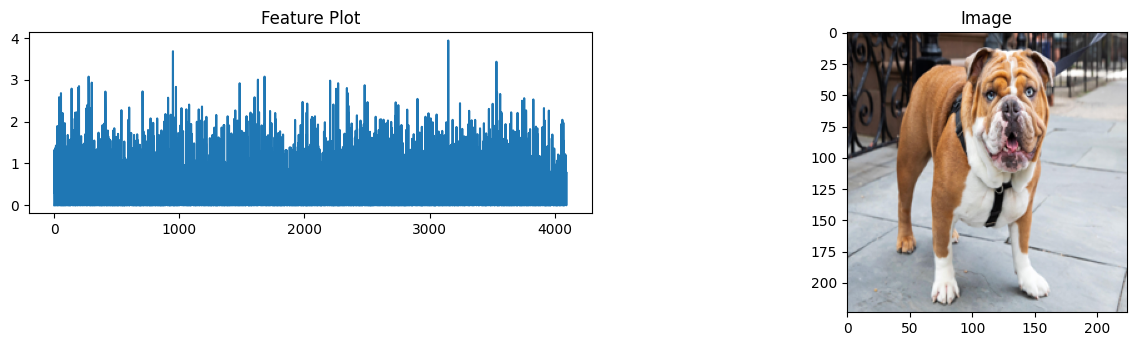

In [27]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image_path = "./Dataset/download/Dog/17.jpeg"
img, x = load_image(image_path)
feat = feat_extractor.predict(x)

plt.figure(figsize=(16, 8))  # Adjust the figure size as needed

# Create the first subplot for the plot of feat[0]
plt.subplot(3, 2, 1)  # 1 row, 2 columns, subplot 1
plt.plot(feat[0])
plt.title('Feature Plot')

# Create the second subplot for displaying the image
plt.subplot(2, 2, 2)  # 1 row, 2 columns, subplot 2
plt.imshow(img)
plt.title('Image')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

In [ ]:
s = 16
for i in range(0, len(feature_dict[s])):
    
    img, x = load_image(dict[s][i])
    plt.figure(figsize=(16, 8))  # Adjust the figure size as needed

    # Create the first subplot for the plot of feat[0]
    plt.subplot(3, 2, 1)  # 1 row, 2 columns, subplot 1
    plt.plot(feature_dict[s][i])
    plt.title('Feature Plot')

    # Create the second subplot for displaying the image
    plt.subplot(2, 2, 2)  # 1 row, 2 columns, subplot 2
    plt.imshow(img)
    plt.title('Image')

    plt.tight_layout()  # Ensure proper spacing between subplots
    plt.show()

In [40]:

image_path = "./Dataset/download/Dog/17.jpeg"
new_image, x = load_image(image_path)
new_features = feat_extractor.predict(x)

# get class ids of image
class_id = get_class_id(object_detection_model, image_path)

search_space = []   
for i in class_id:
    search_space = feature_dict[i]



1/1 [==============================] - 0s 240ms/step

image 1/1 /home/epsilon/Desktop/Google-lens-prototype/Dataset/download/Dog/17.jpeg: 448x640 1 dog, 71.2ms
Speed: 3.4ms preprocess, 71.2ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


In [42]:
search_space == feature_dict[16]

True

In [45]:
from scipy.spatial import distance



def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        # print(idx)
        img = image.load_img(dict[16][idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image
    



Text(0.5, 1.0, 'Direct Vectorization results')

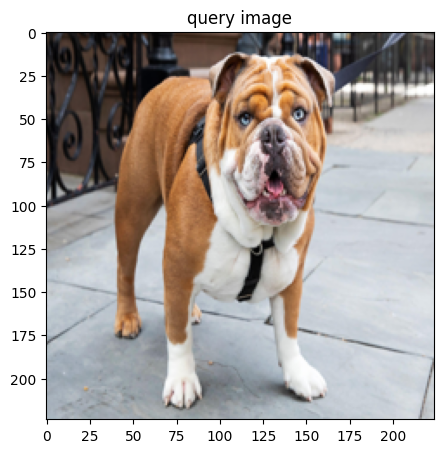

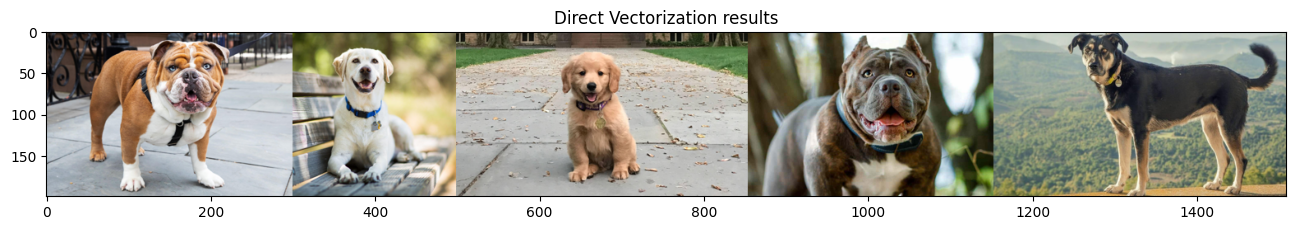

In [44]:

n_distances = [ distance.cosine(new_features[0], feat) for feat in feature_dict[16] ]

n_idx_closest = sorted(range(len(n_distances)), key=lambda k: n_distances[k])[0:5]  # grab first 5
n_results_image = get_concatenated_images(n_idx_closest, 200)

# display the results
plt.figure(figsize = (5,15))
plt.imshow(new_image)
plt.title("query image")


# display the resulting images
plt.figure(figsize = (16,8))
plt.imshow(n_results_image)
plt.title("Direct Vectorization results")

# Image Retrieval using Object Detection and Feature Extraction

In [46]:
from scipy.spatial import distance



def get_concatenated_images_from_reduced_dictionary(indexes, thumb_height , image_dict):
    thumbs = []
    for idx in indexes:
        # print(idx)
        img = image.load_img(image_dict[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

1/1 [==============================] - 0s 303ms/step

image 1/1 /home/epsilon/Desktop/Google-lens-prototype/Dataset/download/Cat/20.jpeg: 384x640 1 cat, 46.8ms
Speed: 2.8ms preprocess, 46.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


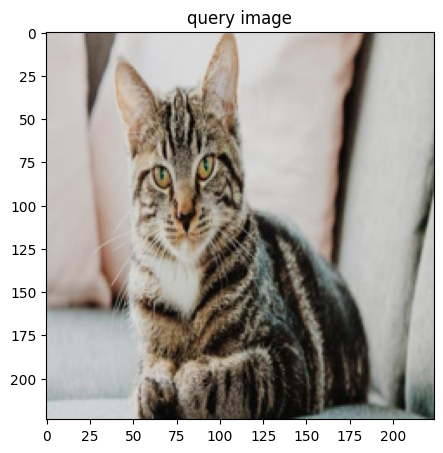

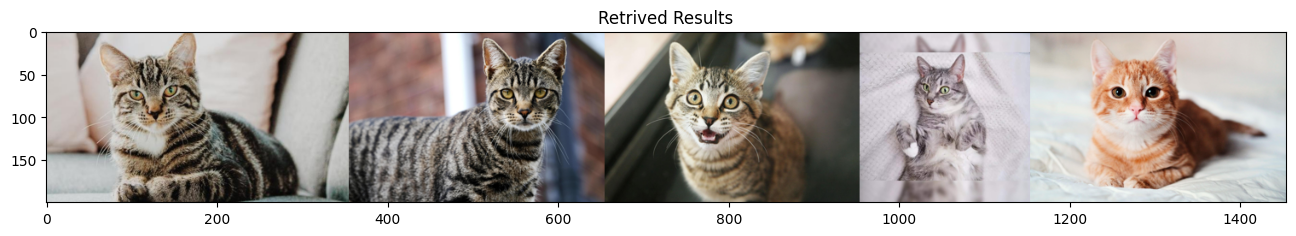

In [56]:
def retriveImage(image_path):
    new_image, x = load_image(image_path)
    new_features = feat_extractor.predict(x)

    # get class ids of image
    class_id = get_class_id(object_detection_model, image_path)

    reduced_feature_space = []
    reduced_image_space = []   
    for i in class_id:
        reduced_feature_space += feature_dict[i]
        reduced_image_space += dict[i]
        
    n_distances = [ distance.cosine(new_features[0], feat) for feat in reduced_feature_space ]
    
    n_idx_closest = sorted(range(len(n_distances)), key=lambda k: n_distances[k])[0:5]  # grab first 5
    n_results_image = get_concatenated_images_from_reduced_dictionary(n_idx_closest, 200, reduced_image_space)
    
    
    # display the results
    plt.figure(figsize = (5,15))
    plt.imshow(new_image)
    plt.title("query image")


    # display the resulting images
    plt.figure(figsize = (16,8))
    plt.imshow(n_results_image)
    plt.title("Retrived Results")
        
    
image_path = "./Dataset/download/Cat/20.jpeg"
retriveImage(image_path)
    
        
        
        